In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [7]:
df = pd.read_csv("workspace_table.csv")
df = pd.read_csv("workspace_table.csv")
data = df.dropna()
print(data.duplicated().any())

data

False


,Unnamed: 0,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,...,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
31,31,5008806,0,C,M,Y,Y,0,112500.0,Working,...,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
32,32,5008806,-1,C,M,Y,Y,0,112500.0,Working,...,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
33,33,5008806,-2,C,M,Y,Y,0,112500.0,Working,...,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
34,34,5008806,-3,C,M,Y,Y,0,112500.0,Working,...,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
35,35,5008806,-4,C,M,Y,Y,0,112500.0,Working,...,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649738,649738,5150487,-25,C,M,Y,N,0,202500.0,Working,...,Married,House / apartment,-19398,-2166,1,0,0,0,Drivers,2.0
649739,649739,5150487,-26,C,M,Y,N,0,202500.0,Working,...,Married,House / apartment,-19398,-2166,1,0,0,0,Drivers,2.0
649740,649740,5150487,-27,C,M,Y,N,0,202500.0,Working,...,Married,House / apartment,-19398,-2166,1,0,0,0,Drivers,2.0
649741,649741,5150487,-28,C,M,Y,N,0,202500.0,Working,...,Married,House / apartment,-19398,-2166,1,0,0,0,Drivers,2.0


In [57]:
#Jaki % klientów jest niewypłacalny? 
#Przyjmujemy, że niewypłacalny jest klient, który spóźnia się ze spłatą powyżej 3 miesięcy.

#Ilość klientów (unikalne ID)

print( "Ilość klientów banku: ", data["ID"].nunique())
loan = data[data["STATUS"]!= "X"]
clients_with_loan = loan["ID"].nunique()

print("Ilość klientów banku, mających pożyczkę: ", clients_with_loan)
insolvent3 = data[data["STATUS"]== "3"] # niewypłacalni w grupie 3
print("Ilość klientów niewypłacalnych w grupie 3 : ", len(insolvent3))
insolvent4 = data[data["STATUS"]== "4"] # niewypłacalni w grupie 4
print("Ilość klientów niewypłacalnych w grupie 4 : ", len(insolvent4))
insolvent5 = data[data["STATUS"]== "5"] # niewypłacalni w grupie 5
print("Ilość klientów niewypłacalnych w grupie 5 : ", len(insolvent5))

insolvent = len(insolvent3) + len(insolvent4) + len(insolvent5)
print("Łączna ilość klientów niewypłacalnych: ", insolvent)

insolvent_percentage = print("Procent niewypłacalnych klientów: ", 100*(insolvent/clients_with_loan))





Ilość klientów banku:  25134
Ilość klientów banku, mających pożyczkę:  22737
Ilość klientów niewypłacalnych w grupie 3 :  181
Ilość klientów niewypłacalnych w grupie 4 :  152
Ilość klientów niewypłacalnych w grupie 5 :  1087
Łączna ilość klientów niewypłacalnych:  1420
Procent niewypłacalnych klientów:  6.245327000043981


C:\Users\OEM\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'oś Y')

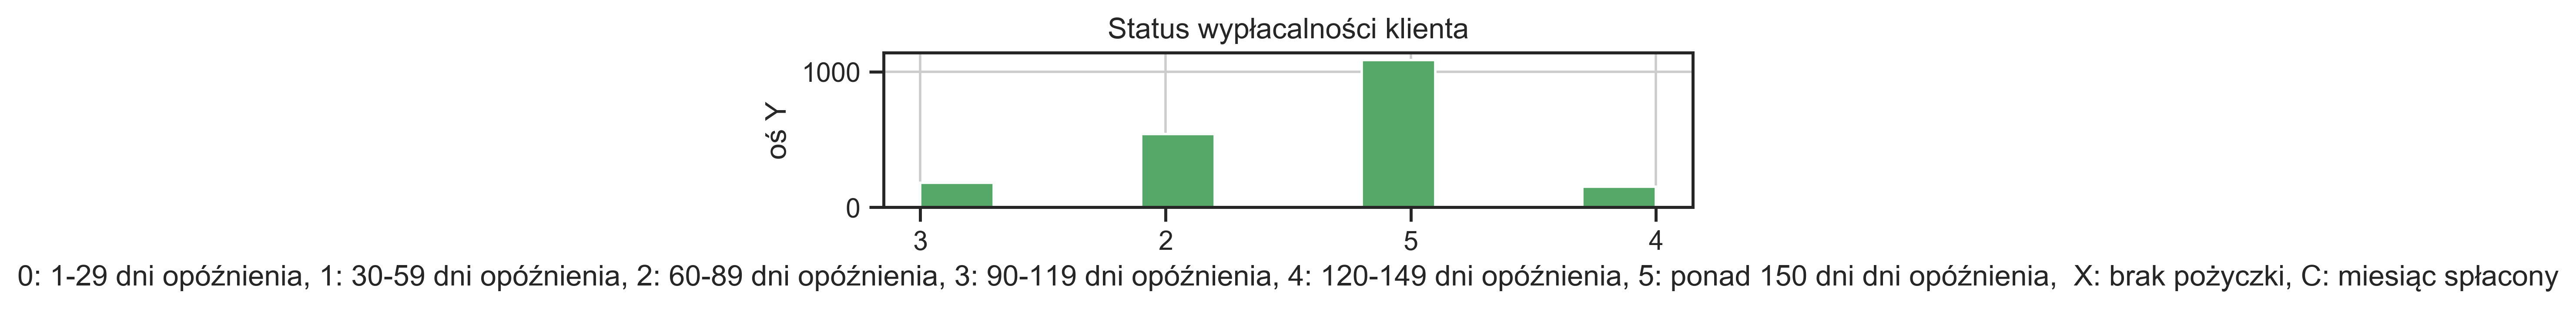

In [69]:
insol = loan[loan["STATUS"]!= "C"][loan["STATUS"]!= "X"][loan["STATUS"]!= "0"]
plt.subplot(3,1,1)
plt.title("Status wypłacalności klienta")
plt.hist(insol["STATUS"], facecolor='g')
plt.grid(True)
plt.rcParams['figure.dpi']= 400
plt.xlabel("0: 1-29 dni opóźnienia, 1: 30-59 dni opóźnienia, 2: 60-89 dni opóźnienia, 3: 90-119 dni opóźnienia, 4: 120-149 dni opóźnienia, 5: ponad 150 dni dni opóźnienia,  X: brak pożyczki, C: miesiąc spłacony")
plt.ylabel("oś Y")

In [82]:
#Jak % rozkłada się niewypłacalność w danych zakresach rocznego przychodu? 


